In [1]:
import pandas as pd
df=pd.read_csv("supply_chain - supply_chain.csv")

In [2]:
!pip install statsmodels


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install plotly


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default="plotly_white"

In [5]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239830,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976920,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


**Now let's get started with analyzing the Supply Chain by 
Looking at the relationship teh price of teh products
and teh revenue generated by them**

In [6]:
fig=px.scatter(df,x="Price",
              y="Revenue generated",
              color="Product type",
              hover_data=["Number of products sold"],
            trendline="ols")
fig.show()

**Thus,the company derives more revenue from skincare
products, and the higher the price of skincare products,the
more revenue they generate. Now let's have a look at teh sales
by produxt type:**

In [7]:
sales_data=df.groupby("Product type")["Number of products sold"].sum().reset_index()
#sales_data
pie_chart=px.pie(sales_data,values="Number of products sold",
                names="Product type",
                title="Sales by Products Type",
                hover_data=["Number of products sold"],
                hole=0.5,
                color_discrete_sequence=px.colors.qualitative.Pastel   )
pie_chart.update_traces(textposition="inside",textinfo="percent+label")
pie_chart.show()

**So 45% of the business comes from skincare products,29.5%
from haircare,and 25.5% from cosmetics.Now let's have a look at the total revenue ge
generated from shipping carries:**

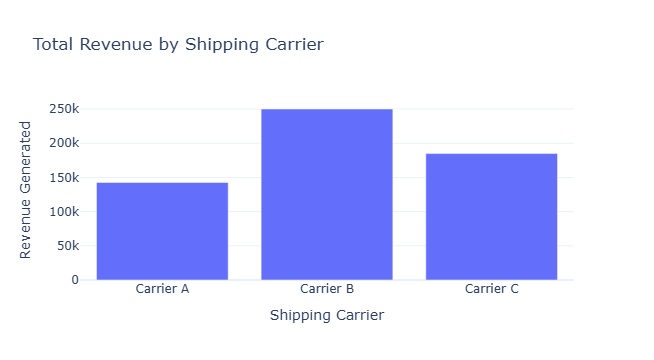

In [9]:
total_revenue=df.groupby("Shipping carriers")["Revenue generated"].sum().reset_index()
fig=go.Figure()
fig.add_trace(go.Bar(x=total_revenue["Shipping carriers"],
                    y=total_revenue["Revenue generated"]))
fig.update_layout(title="Total Revenue by Shipping Carrier",
                 xaxis_title="Shipping Carrier",
                 yaxis_title="Revenue Generated")
fig.show()

**So the company is using three carries for transportation, and Carries B
helps teh company in generating more revenue.Now let's
have a look at the Average lead time and Average Manufacturing Costs
for all products of the commpany:**

In [10]:
avg_lead_time=df.groupby("Product type")["Lead time"].mean().reset_index()

In [11]:
avg_manu_costs=df.groupby("Product type")["Manufacturing costs"].mean().reset_index()

In [12]:
a=pd.merge(avg_lead_time,avg_manu_costs,on="Product type")


In [13]:
a=a.rename(columns={"Lead time":"Avg Lead time","Manufacturing costs":"Avg Manu costs"})

In [14]:
a

,Product type,Avg Lead time,Avg Manu costs
0,cosmetics,13.538462,43.052740
1,haircare,18.705882,48.457993
2,skincare,18.000000,48.993157


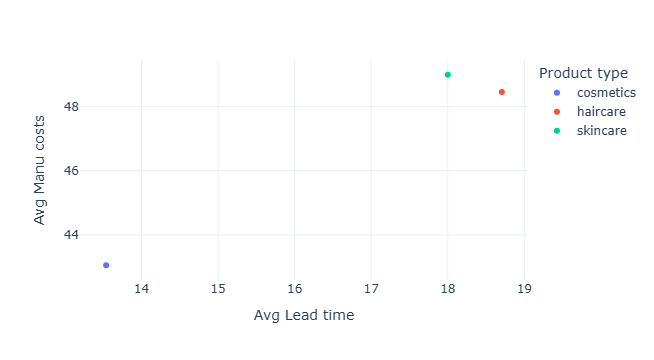